## IMPORTING LIBRARIES

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## DATA PRE-PROCESSING

### Training Image Pre-Processing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train',
label_mode="categorical",
image_size=(128,128)
) 

Found 70295 files belonging to 38 classes.


### Validation Image Pre-Processing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid',
label_mode="categorical",
image_size=(128,128)
)

Found 17572 files belonging to 38 classes.


In [5]:
for x,y in training_set:
    print(x, x.shape)
    print(y, y.shape)
    break

tf.Tensor(
[[[[159.   140.   136.  ]
   [146.   127.   123.  ]
   [146.25 127.25 123.25]
   ...
   [139.25 119.25 118.25]
   [157.5  137.5  136.5 ]
   [163.5  143.5  142.5 ]]

  [[152.25 133.25 129.25]
   [150.   131.   127.  ]
   [158.75 139.75 135.75]
   ...
   [165.75 145.75 144.75]
   [181.   161.   160.  ]
   [154.5  134.5  133.5 ]]

  [[159.25 140.25 136.25]
   [163.   144.   140.  ]
   [149.75 130.75 126.75]
   ...
   [153.75 133.75 132.75]
   [171.75 151.75 150.75]
   [164.25 144.25 143.25]]

  ...

  [[173.5  149.5  147.5 ]
   [168.   144.   142.  ]
   [165.   141.   139.  ]
   ...
   [176.5  157.5  153.5 ]
   [162.5  143.5  139.5 ]
   [171.5  152.5  148.5 ]]

  [[183.25 159.25 157.25]
   [175.5  151.5  149.5 ]
   [170.75 146.75 144.75]
   ...
   [190.   171.   167.  ]
   [163.5  144.5  140.5 ]
   [167.25 148.25 144.25]]

  [[173.   149.   147.  ]
   [172.   148.   146.  ]
   [167.   143.   141.  ]
   ...
   [167.75 148.75 144.75]
   [167.75 148.75 144.75]
   [162.5  143.5  13

In [6]:
for x,y in validation_set:
    print(x, x.shape)
    print(y, y.shape)
    break

tf.Tensor(
[[[[ 94.75  85.75  90.75]
   [ 99.    90.    95.  ]
   [ 97.5   88.5   93.5 ]
   ...
   [160.   155.   161.  ]
   [165.25 160.25 166.25]
   [170.75 165.75 171.75]]

  [[100.5   91.5   96.5 ]
   [100.25  91.25  96.25]
   [104.25  95.25 100.25]
   ...
   [158.   153.   159.  ]
   [159.25 154.25 160.25]
   [160.5  155.5  161.5 ]]

  [[100.75  91.75  96.75]
   [ 83.75  74.75  79.75]
   [ 90.    81.    86.  ]
   ...
   [161.25 156.25 162.25]
   [161.5  156.5  162.5 ]
   [160.75 155.75 161.75]]

  ...

  [[112.75 106.75 116.75]
   [110.25 104.25 114.25]
   [122.75 116.75 126.75]
   ...
   [155.5  157.5  169.5 ]
   [154.   156.   168.  ]
   [154.25 156.25 168.25]]

  [[106.25 100.25 110.25]
   [118.5  112.5  122.5 ]
   [102.25  96.25 106.25]
   ...
   [162.5  164.5  176.5 ]
   [162.5  164.5  176.5 ]
   [160.75 162.75 174.75]]

  [[115.75 109.75 119.75]
   [102.75  96.75 106.75]
   [104.    98.   108.  ]
   ...
   [157.   159.   171.  ]
   [154.75 156.75 168.75]
   [156.25 158.25 17

## GPU SUPPORT

In [7]:
if tf.config.list_physical_devices('GPU'):
    print("OK! GPU is available and ready for use!")
else:
    print("NO! GPU not found. Falling back to CPU.")


OK! GPU is available and ready for use!


## BUILDING MODEL

In [8]:
from tensorflow.keras.layers import Dense , Conv2D , MaxPool2D , Flatten , GlobalAveragePooling2D, Input, Dropout
from tensorflow.keras.models import Sequential

### Building Convolutional Layer

In [9]:
model = Sequential()

In [10]:
model.add(Input(shape=(128, 128, 3)))
model.add(Conv2D(filters=32 , kernel_size=3 , padding='same' , activation='relu'))
model.add(Conv2D(filters=32 , kernel_size=3 , activation='relu'))
model.add(MaxPool2D(pool_size=2 , strides=2))

model.add(Conv2D(filters=64 , kernel_size=3 , padding='same' , activation='relu'))
model.add(Conv2D(filters=64 , kernel_size=3 , activation='relu'))
model.add(MaxPool2D(pool_size=2 , strides=2))

model.add(Conv2D(filters=128 , kernel_size=3 , padding='same' , activation='relu'))
model.add(Conv2D(filters=128 , kernel_size=3 , activation='relu'))
model.add(MaxPool2D(pool_size=2 , strides=2))

model.add(Conv2D(filters=256 , kernel_size=3 , padding='same' , activation='relu'))
model.add(Conv2D(filters=256 , kernel_size=3 , activation='relu'))
model.add(MaxPool2D(pool_size=2 , strides=2))

model.add(Conv2D(filters=512 , kernel_size=3 , padding='same' , activation='relu' ))
model.add(Conv2D(filters=512 , kernel_size=3 , activation='relu'))
model.add(MaxPool2D(pool_size=2 , strides=2))

model.add(GlobalAveragePooling2D())

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(units=1500, activation='relu'))

model.add(Dropout(0.35))

model.add(Dense(units=38, activation='softmax'))

### Compiling Model

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001) , loss='categorical_crossentropy' , metrics=['accuracy'])

### Model Summary

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

## TRAINING MODEL

In [13]:
training_history = model.fit(x= training_set , validation_data= validation_set , epochs = 5)

Epoch 1/5
2197/2197 [==============================] - 248s 106ms/step - loss: 1.4652 - accuracy: 0.5676 - val_loss: 0.5110 - val_accuracy: 0.8376
Epoch 2/5
2197/2197 [==============================] - 198s 90ms/step - loss: 0.4483 - accuracy: 0.8581 - val_loss: 0.2765 - val_accuracy: 0.9111
Epoch 3/5
2197/2197 [==============================] - 199s 90ms/step - loss: 0.2598 - accuracy: 0.9158 - val_loss: 0.2264 - val_accuracy: 0.9263
Epoch 4/5
2197/2197 [==============================] - 200s 91ms/step - loss: 0.1813 - accuracy: 0.9411 - val_loss: 0.1859 - val_accuracy: 0.9416
Epoch 5/5
2197/2197 [==============================] - 197s 90ms/step - loss: 0.1351 - accuracy: 0.9558 - val_loss: 0.1655 - val_accuracy: 0.9472


## MODEL EVALUATION

In [14]:
train_loss,train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 73s 33ms/step - loss: 0.0895 - accuracy: 0.9701


In [15]:
print(train_loss)
print(train_acc)

0.08949877321720123
0.9701116681098938


In [16]:
val_loss,val_acc = model.evaluate(validation_set)

550/550 [==============================] - 19s 34ms/step - loss: 0.1655 - accuracy: 0.9472


In [17]:
print(val_loss)
print(val_acc)

0.16547763347625732
0.9472455978393555


## SAVE MODEL

In [18]:
model.save("trained_cnn_model.keras")

## TRAINING HISTORY SAVING

In [19]:
training_history.history

{'loss': [1.465206265449524,
  0.4483475089073181,
  0.25980904698371887,
  0.18128575384616852,
  0.13505180180072784],
 'accuracy': [0.5675652623176575,
  0.8581122159957886,
  0.915826141834259,
  0.9411195516586304,
  0.9558005332946777],
 'val_loss': [0.511020839214325,
  0.27652233839035034,
  0.22641947865486145,
  0.18585367500782013,
  0.16547763347625732],
 'val_accuracy': [0.8376394510269165,
  0.9111085534095764,
  0.9263032078742981,
  0.9415547251701355,
  0.9472455978393555]}

In [20]:
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history , f)

## MODEL VISUALIZATION

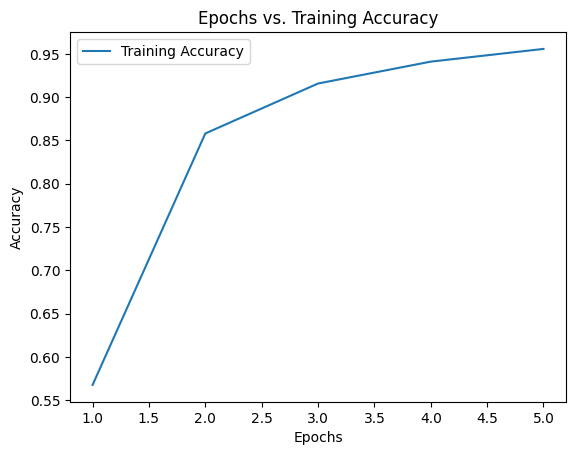

In [24]:
epochs = [i for i in range (1,6)]
plt.plot(epochs, training_history.history['accuracy'] , label='Training Accuracy' )
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Epochs vs. Training Accuracy')
plt.savefig('Visualization_images\\Epochs vs. Training Accuracy.JPG')

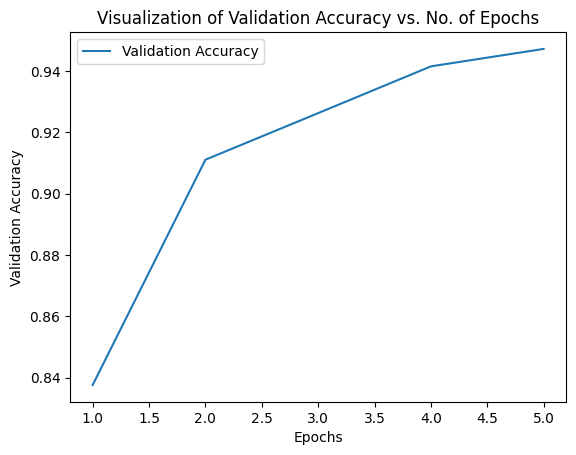

In [25]:
epochs = [i for i in range (1,6)]
plt.plot(epochs, training_history.history['val_accuracy'] , label='Validation Accuracy' )
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title('Visualization of Validation Accuracy vs. No. of Epochs')
plt.savefig("Visualization_images\\Validation Accuracy vs. No. of Epochs.JPG")

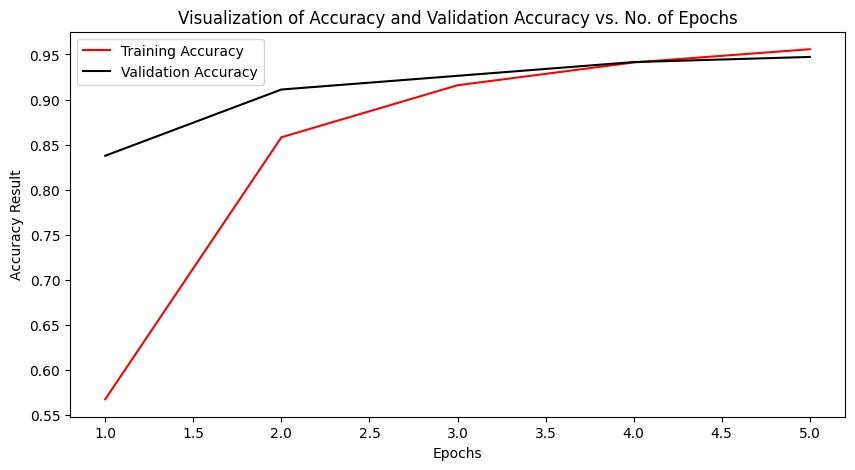

In [27]:
epochs = [i for i in range (1,6)]
plt.figure(figsize=(10,5))
plt.plot(epochs, training_history.history['accuracy'] , color='red', label='Training Accuracy' )
plt.plot(epochs, training_history.history['val_accuracy'] , color='black', label='Validation Accuracy' )
plt.xlabel('Epochs')
plt.ylabel('Accuracy Result')
plt.legend()
plt.title('Visualization of Accuracy and Validation Accuracy vs. No. of Epochs')
plt.savefig("Visualization_images\\Training Accuracy and Validation Accuracy vs. No. of Epochs.JPG")

## MODEL METRICS EVALUATION

In [28]:
class_name = validation_set.class_names

In [29]:
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [31]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid',
label_mode="categorical",
shuffle=False,
image_size=(128,128)
)

Found 17572 files belonging to 38 classes.


In [32]:
y_pred = model.predict(test_set)


550/550 [==============================] - 17s 30ms/step


In [33]:
y_pred, y_pred.shape


(array([[9.9999642e-01, 3.4353327e-06, 1.1651526e-10, ..., 1.3919059e-14,
         6.1319932e-13, 8.7149081e-12],
        [9.9737275e-01, 2.5672254e-03, 4.8038595e-07, ..., 1.2894298e-10,
         7.0112378e-09, 1.8389882e-07],
        [1.0000000e+00, 7.0688561e-10, 1.2570426e-11, ..., 3.0980178e-18,
         1.8639534e-15, 7.2881967e-14],
        ...,
        [9.6817787e-10, 1.6659017e-12, 2.4332194e-09, ..., 1.4330694e-10,
         1.3464837e-09, 9.9996805e-01],
        [1.4597920e-11, 4.7392256e-15, 5.1594137e-12, ..., 5.5233964e-13,
         3.0024355e-12, 9.9999988e-01],
        [1.7597963e-13, 1.6162986e-15, 9.1048181e-14, ..., 7.0582117e-14,
         1.7456253e-13, 9.9998665e-01]], dtype=float32),
 (17572, 38))

In [34]:
predicted_categories = tf.argmax(y_pred, axis=1)


In [35]:
predicted_categories


<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [36]:
true_categories = tf.concat([y for x,y in test_set], axis=0)


In [37]:
true_categories


<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [38]:
y_true = tf.argmax(true_categories, axis=1)


In [39]:
y_true


<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

## METRICS

In [57]:
from sklearn.metrics import classification_report , confusion_matrix, recall_score, precision_score, f1_score

In [43]:
print(classification_report(y_true, predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.94      0.95      0.95       504
                                 Apple___Black_rot       0.95      0.99      0.97       497
                          Apple___Cedar_apple_rust       0.99      0.90      0.94       440
                                   Apple___healthy       0.93      0.97      0.95       502
                               Blueberry___healthy       0.95      0.98      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.99      0.95      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.88      0.91       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.97      0.

In [44]:
print(confusion_matrix(y_true, predicted_categories))

[[480   6   0 ...   0   0   0]
 [  1 493   0 ...   0   0   0]
 [  5   0 394 ...   0   1   2]
 ...
 [  0   0   0 ... 449   0   0]
 [  0   0   0 ...   0 445   0]
 [  0   0   0 ...   0   0 467]]


In [45]:
confusion_matrix(y_true, predicted_categories).shape

(38, 38)

In [53]:
print(precision_score(y_true, predicted_categories, average= 'weighted'))

0.9488976467397121


In [55]:
print(recall_score(y_true, predicted_categories, average='weighted'))

0.947245618028682


In [59]:
print(f1_score(y_true, predicted_categories, average='weighted'))

0.9473430944116076


<AxesSubplot: >

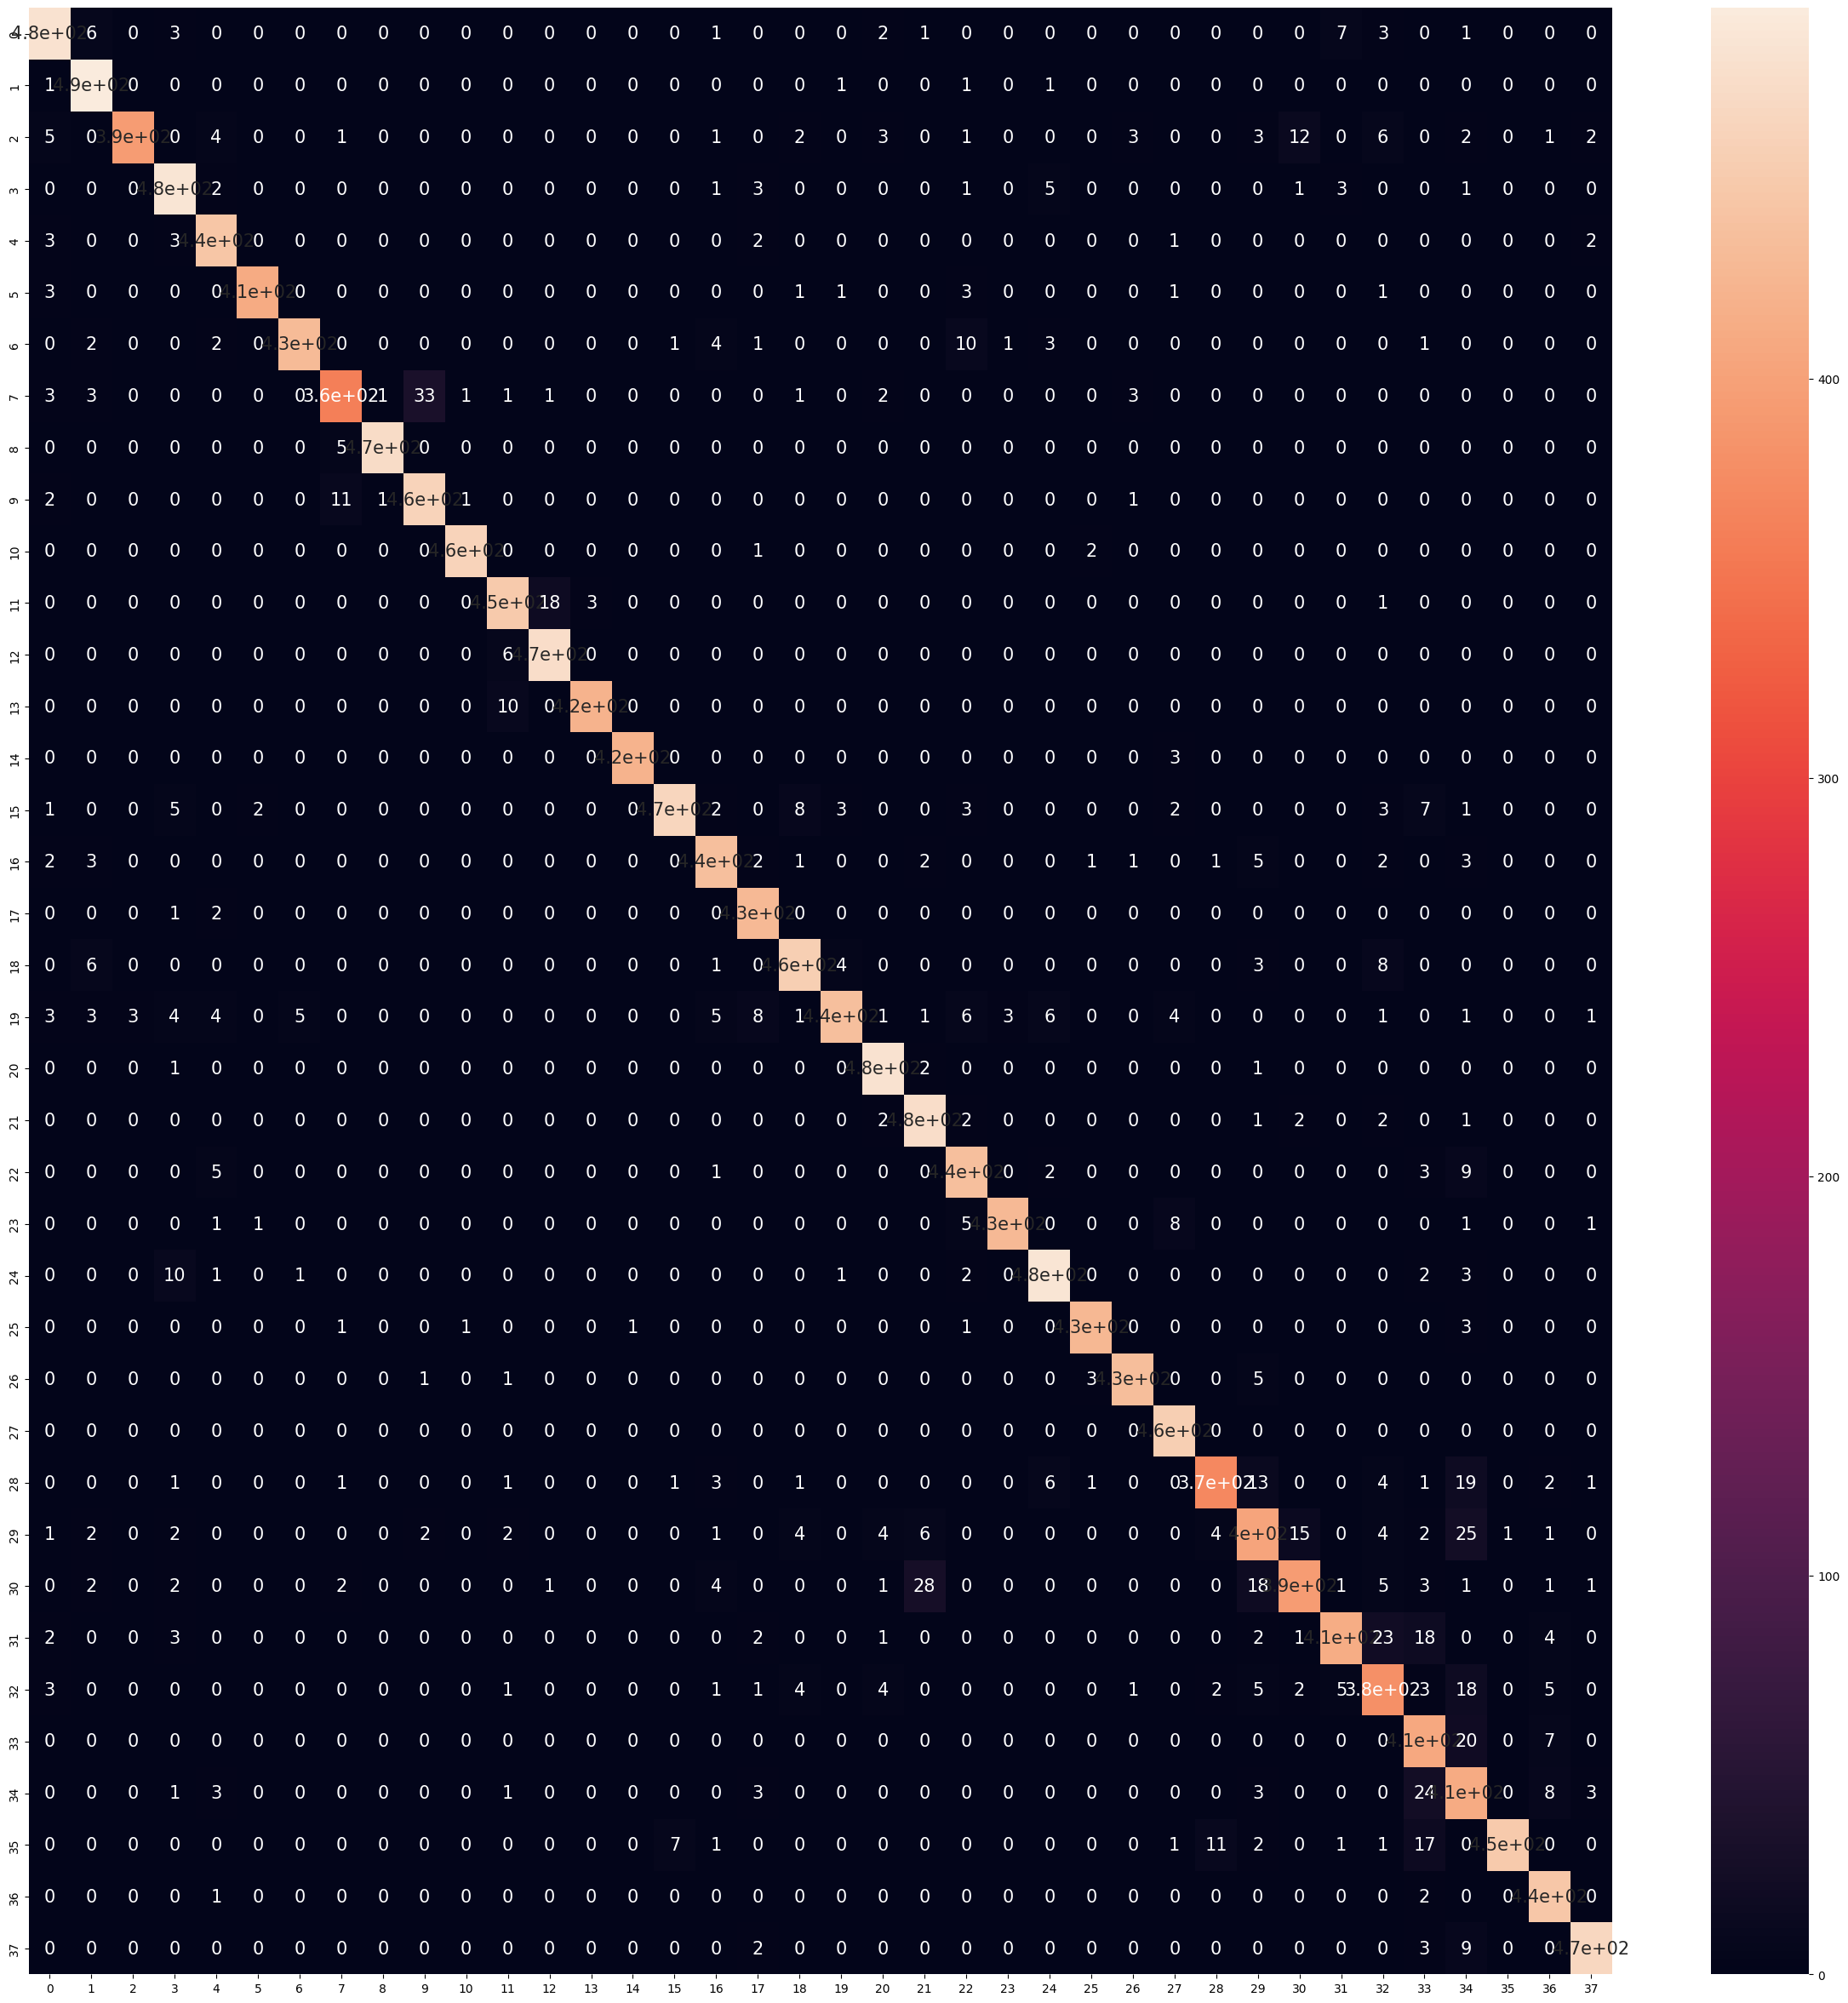

In [64]:
cnf = confusion_matrix(y_true, predicted_categories)
plt.figure(figsize=(30,30))
sns.heatmap(cnf, annot=True, annot_kws={'size':15})